In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ["PG", "MSFT", "F", "GE"]

In [3]:
mydata = pd.DataFrame()

In [6]:
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source="yahoo", start="1995-1-1")["Adj Close"]

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6515 entries, 1995-01-03 to 2020-11-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6515 non-null   float64
 1   MSFT    6515 non-null   float64
 2   F       6515 non-null   float64
 3   GE      6515 non-null   float64
dtypes: float64(4)
memory usage: 254.5 KB


In [8]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.215732,2.401030,4.242091,4.062095
1995-01-04,8.149876,2.418484,4.356228,4.062095
1995-01-05,8.034625,2.378592,4.318182,4.072051
1995-01-06,8.051086,2.418484,4.318182,4.052139
1995-01-09,8.018162,2.403525,4.394274,4.012317


In [9]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-11-09,137.990005,218.389999,8.2000,8.72
2020-11-10,140.259995,211.009995,8.3800,8.98
2020-11-11,142.070007,216.550003,8.3300,8.89
2020-11-12,142.149994,215.440002,8.2100,8.76
2020-11-13,142.910095,215.179993,8.4955,9.09


In [11]:
mydata.iloc[0]

PG      8.215732
MSFT    2.401030
F       4.242091
GE      4.062095
Name: 1995-01-03 00:00:00, dtype: float64

In [17]:
mydata.loc["1995-01-03"]

PG      8.215732
MSFT    2.401030
F       4.242091
GE      4.062095
Name: 1995-01-03 00:00:00, dtype: float64

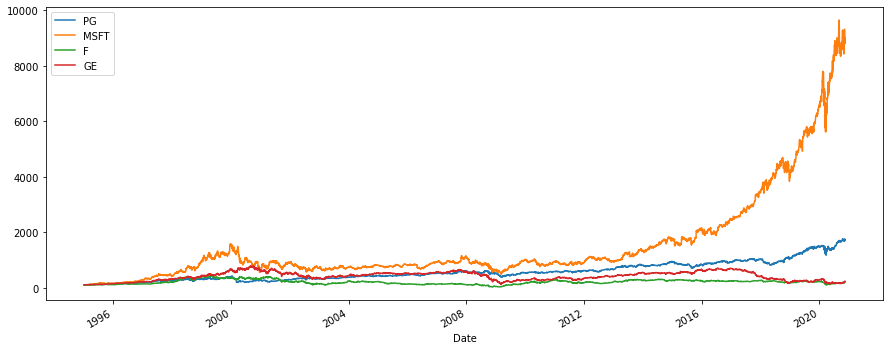

In [16]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15,6))

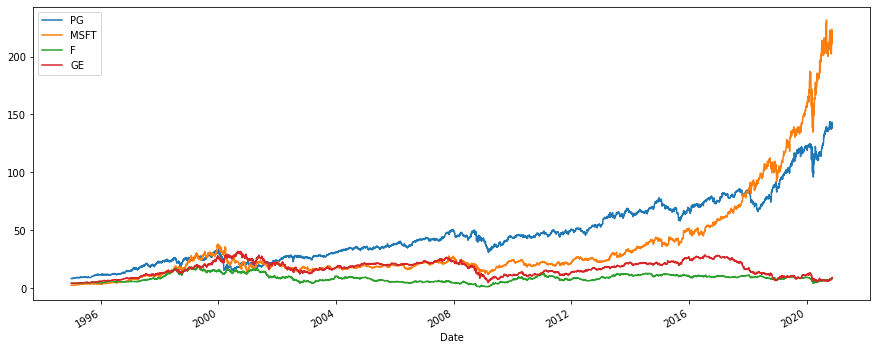

In [15]:
mydata.plot(figsize=(15,6))

In [19]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017621,-0.009827


In [20]:
# tickers = ["PG", "MSFT", "F", "GE"]
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [21]:
np.dot(returns, weights)

array([        nan,  0.00653982, -0.00922977, ...,  0.00579266,
       -0.00839794,  0.01914653])

In [23]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.135335
MSFT    0.222723
F       0.106347
GE      0.082170
dtype: float64

In [24]:
np.dot(annual_returns, weights)

0.13664359768722636

In [25]:
# tickers = ["PG", "MSFT", "F", "GE"]
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [31]:
pfolio_1 = str(round(np.dot(annual_returns, weights) * 100, 5)) + "%"
pfolio_2 = str(round(np.dot(annual_returns, weights_2) * 100, 5)) + "%"

In [32]:
print (pfolio_1)
print (pfolio_2)

13.66436%
16.32836%
